**EXERCISE 1**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Data from file
file_path = '/content/1.01. Simple linear regression.csv'
dataframe = pd.read_csv(file_path)

In [5]:
# Convert to Numpy
x1 = np.array(dataframe['SAT'])
y = np.array(dataframe['GPA'])

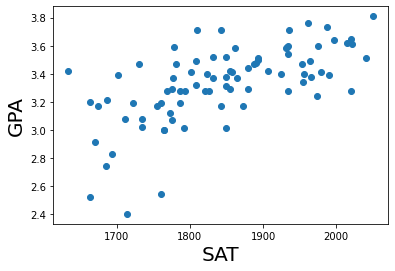

In [6]:
# Visualization
plt.scatter(x1, y)
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPA', fontsize = 20)
plt.show()

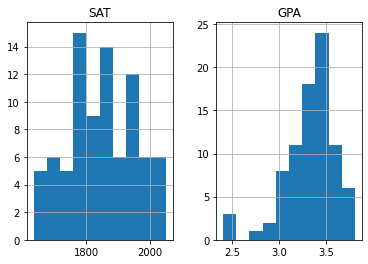

In [7]:
# Histogram
dataframe.hist()
plt.show()

In [8]:
# Correlation
correlation = dataframe.corr()
print(correlation)

          SAT       GPA
SAT  1.000000  0.637184
GPA  0.637184  1.000000


In [9]:
# Using Scikit-learn for Machine Learning
from sklearn import linear_model

In [42]:
# Create model and train it
regression_model = linear_model.LinearRegression()
regression_model.fit(x1.reshape(84, 1), y.reshape(84, 1))   # Train

LinearRegression()

In [43]:
# Visualize model
print("Model Intercept:")
print(regression_model.intercept_)
print("Model Coefficient:")
print(regression_model.coef_)

Model Intercept:
[0.2750403]
Model Coefficient:
[[0.00165569]]


**EXERCISE 2**

In [16]:
# Read data from file
file_path2 = '/content/mtcars.csv'
dataframe2 = pd.read_csv(file_path2)
dataframe2.head(10)

,Unnamed: 0,mpg,disp,hp,wt
0,Mazda RX4,21.0,160.0,110,2.620
1,Mazda RX4 Wag,21.0,160.0,110,2.875
2,Datsun 710,22.8,108.0,93,2.320
3,Hornet 4 Drive,21.4,258.0,110,3.215
4,Hornet Sportabout,18.7,360.0,175,3.440
5,Valiant,18.1,225.0,105,3.460
6,Duster 360,14.3,360.0,245,3.570
7,Merc 240D,24.4,146.7,62,3.190
8,Merc 230,22.8,140.8,95,3.150
9,Merc 280,19.2,167.6,123,3.440


In [17]:
# Data frame infomation - Way 1
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   disp        32 non-null     float64
 3   hp          32 non-null     int64  
 4   wt          32 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.4+ KB


In [19]:
# Data frame dimension - Way 2
dataframe2.shape

(32, 5)

In [26]:
# Create data instance
mpg_x = np.array(dataframe2['mpg']).reshape(32, 1)
disp_x = np.array(dataframe2['disp']).reshape(32, 1)
hp_x = np.array(dataframe2['hp']).reshape(32, 1)
wt_x = np.array(dataframe2['wt']).reshape(32, 1)

In [21]:
# Correlation
correlation2 = dataframe2.corr()
print(correlation2)

           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


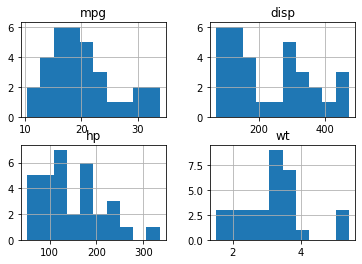

In [27]:
# Histogram
dataframe2.hist()
plt.show()

<AxesSubplot:xlabel='wt', ylabel='mpg'>

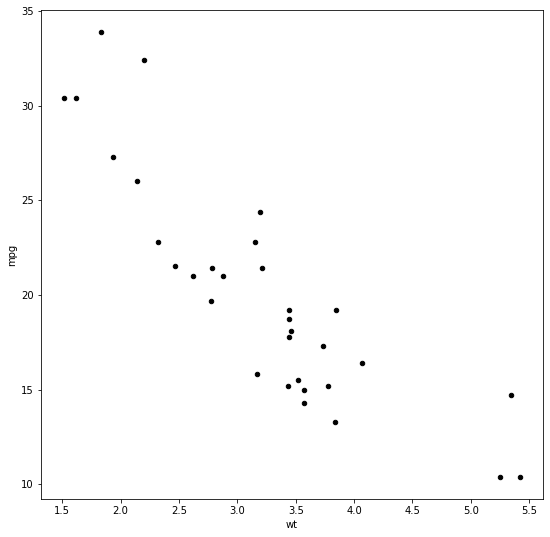

In [32]:
# Create training dataset - Way 1
X = dataframe2.drop(dataframe2.columns[0:2], axis = 1)
dataframe2.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9), color = 'black')


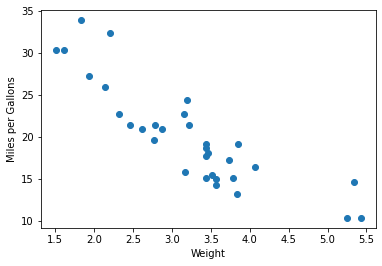

In [37]:
# Dataset - Way 2
plt.scatter(wt_x, mpg_x)
plt.xlabel('Weight')
plt.ylabel('Miles per Gallons')
plt.show()

In [40]:
# Create model and train it
regression_model2 = linear_model.LinearRegression()
regression_model2.fit(wt_x, mpg_x)   # Train - remember to use the Rx1 dimensional data

LinearRegression()

In [41]:
# Visualize model
print("Model Intercept:")
print(regression_model2.intercept_)
print("Model Coefficient:")
print(regression_model2.coef_)

Model Intercept:
[37.28512617]
Model Coefficient:
[[-5.34447157]]


In [45]:
# Evaluation
regression_model2.score(wt_x, mpg_x)

0.7528327936582646

In [55]:
# Make predictions
y_pred = regression_model2.predict(pd.DataFrame(dataframe2['wt']))    # The pd.DataFrame convert into the 1D data
residual = pd.DataFrame(dataframe2['mpg'])- y_pred    # Difference between data and predictions

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:413: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [53]:
residual.describe()

,mpg
count,3.200000e+01
mean,-8.215650e-15
std,2.996352e+00
min,-4.543151e+00
25%,-2.364709e+00
50%,-1.251956e-01
75%,1.409561e+00
max,6.872711e+00


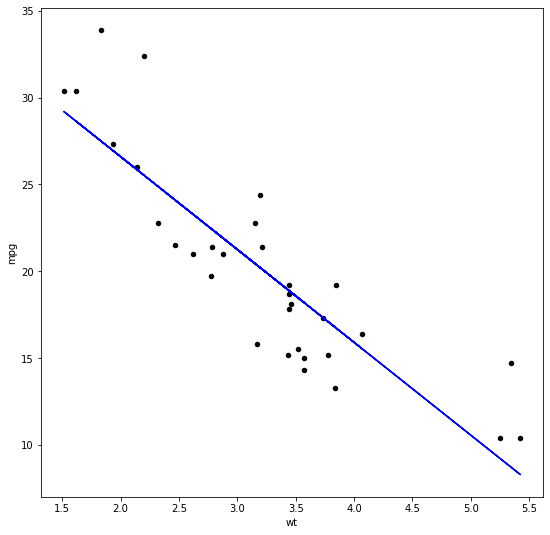

In [54]:
# Visualizing data and predictions
dataframe2.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9), color = 'black')
plt.plot(dataframe2['wt'], y_pred, color = 'blue')

In [56]:
# Implement Polynomial Regression
poly_model = linear_model.LinearRegression()
x_set = pd.DataFrame([dataframe2['wt'], dataframe2['wt']**2]).T
y_set = pd.DataFrame(dataframe2['mpg'])

In [57]:
poly_model.fit(x_set, y_set)

LinearRegression()

In [61]:
# Polynomial Model Information
print('Polynomial Intercepts:', poly_model.intercept_)
print('Polynomial Coefficients:', poly_model.coef_)
print('Precision:', poly_model.score(x_set, y_set))

Polynomial Intercepts: [49.93081095]
Polynomial Coefficients: [[-13.38033708   1.17108689]]
Precision: 0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


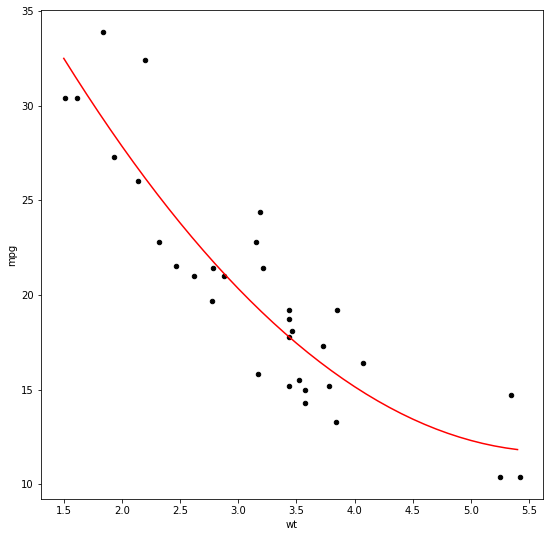

In [74]:
# Make Predictions
rang = np.arange(1.5, 5.5, 0.1)
x_pred = pd.DataFrame([rang, rang**2]).T
y_poly_pred = poly_model.predict(x_pred)

# Visualization
dataframe2.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9), color = 'black')
plt.plot(rang, y_poly_pred, color = 'red')

**HIGHER ORDER POLYNOMIAL REGRESSION**

Below code can run whatever order that you want, just type the highest order

In [108]:
# High order polynomial
x_lst  = [dataframe2['wt'], dataframe2['wt']**2]
y_high = pd.DataFrame(dataframe2['mpg'])
range_lst = [rang, rang**2]
high_intercept_lst = []
high_coeff_lst = []
high_score_lst = []
highest_ord = 10
order = 3

# Num of elements = highest order - 3
while order < (highest_ord + 1):
  x_lst.append(dataframe2['wt']**order)
  range_lst.append(rang**order)
  x_high = pd.DataFrame(x_lst).T
  poly_model.fit(x_high, y_high)

  # Store model information
  high_intercept_lst.append(poly_model.intercept_)
  high_coeff_lst.append(poly_model.coef_)
  high_score_lst.append(poly_model.score(x_high, y_high))
  order = order + 1

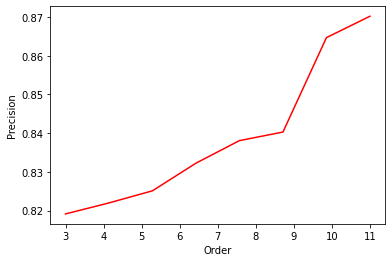

In [109]:
# Precision overtime
order_lst = np.linspace(3, highest_ord + 1, highest_ord - 3 + 1)
plt.plot(order_lst, high_score_lst, 'r')
plt.xlabel('Order')
plt.ylabel('Precision')
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, '10th order polynomial')

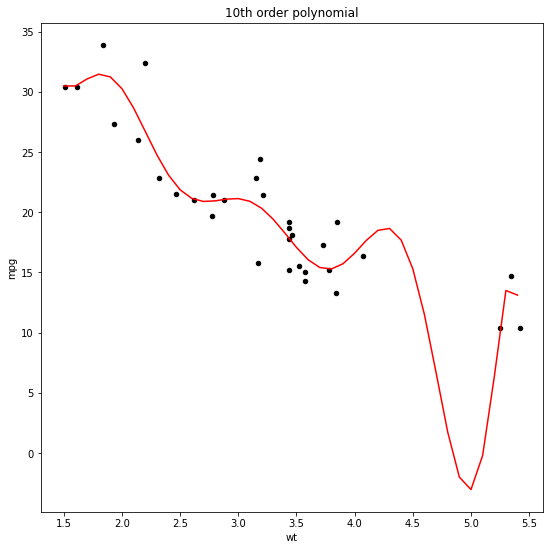

In [112]:
# This code run the last polynomial - the highest
x_order = pd.DataFrame(range_lst).T
y_order = poly_model.predict(x_order)

# Visualization
dataframe2.plot(kind = 'scatter', x = 'wt', y = 'mpg', figsize = (9, 9), color = 'black')
plt.plot(rang, y_order, color = 'red')
titl = '{ord}th order polynomial'.format(ord = highest_ord)
plt.title(titl)

In [ ]:
# Import libraries
import seaborn as sns